# Libraries

In [1]:
library(DESeq2)
library(biomaRt)
library(ggplot2)
library(org.Hs.eg.db)
library(reshape2)

Lade nötiges Paket: S4Vectors

Lade nötiges Paket: stats4

Lade nötiges Paket: BiocGenerics


Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attache Paket: ‘S4Vectors’


Die folgenden Objekte sind maskiert von ‘package:base’:

    I, expand.grid, unname


Lade nötiges Paket: IRanges

Lade nötiges Paket: GenomicRanges

Lade nötiges Paket: GenomeInfoDb

Lade nötiges Paket: SummarizedExperiment

Lade nötiges Paket: MatrixGenerics

Lade nötiges Paket: matrixStats


A

# Options

In [2]:
options(stringsAsFactors = F)

# Read in data

 ## Read in raw data

In [3]:
cell_lines <- c("Ly1"
               ,"Ly8")

In [4]:
# read in counts
counts <- lapply(cell_lines
                   ,function(cell_line){
                       read.csv(paste0("counts_raw_"
                                      ,cell_line
                                      ,".txt")
                               ,sep = "\t"
                               ,header = TRUE)
                   })
names(counts) <- cell_lines

print(str(counts))

List of 2
 $ Ly1:'data.frame':	35500 obs. of  16 variables:
  ..$ Ly1_KO_E8_1  : int [1:35500] 0 471 3 29 0 1 0 37 20 22 ...
  ..$ Ly1_KO_E8_2  : int [1:35500] 0 649 5 32 0 0 1 57 32 33 ...
  ..$ Ly1_KO_G1_1  : int [1:35500] 0 663 6 48 1 0 1 43 40 32 ...
  ..$ Ly1_KO_G1_2  : int [1:35500] 0 563 2 36 0 0 1 32 24 30 ...
  ..$ Ly1_KO_H3_1  : int [1:35500] 1 756 4 33 1 0 0 45 38 33 ...
  ..$ Ly1_KO_H3_2  : int [1:35500] 0 908 7 29 0 0 2 56 45 50 ...
  ..$ Ly1_cas9_1_1 : int [1:35500] 8 488 9 22 0 0 0 20 35 24 ...
  ..$ Ly1_cas9_1_2 : int [1:35500] 11 510 4 20 1 0 1 31 30 31 ...
  ..$ Ly1_cas9_7_1 : int [1:35500] 3 654 6 21 2 0 1 44 44 35 ...
  ..$ Ly1_cas9_7_2 : int [1:35500] 10 1002 5 43 2 0 1 73 59 57 ...
  ..$ Ly1_cas9_9_1 : int [1:35500] 4 316 2 21 1 0 3 17 31 13 ...
  ..$ Ly1_cas9_9_2 : int [1:35500] 1 819 5 32 1 0 3 39 30 52 ...
  ..$ Ly1_het_F10_1: int [1:35500] 1 238 0 9 1 0 0 15 8 12 ...
  ..$ Ly1_het_F10_2: int [1:35500] 0 563 3 30 1 0 2 51 39 24 ...
  ..$ Ly1_het_F9_1 : int [1:3

In [5]:
# read in annotation
anno <- lapply(cell_lines
                   ,function(cell_line){
                       read.csv(paste0("anno_"
                                      ,cell_line
                                      ,".txt")
                               ,sep = "\t"
                               ,header = TRUE)
                   })
names(anno) <- cell_lines

print(str(anno))

List of 2
 $ Ly1:'data.frame':	16 obs. of  6 variables:
  ..$ ID        : chr [1:16] "Ly1_KO_E8_1" "Ly1_KO_E8_2" "Ly1_KO_G1_1" "Ly1_KO_G1_2" ...
  ..$ Cell_line : chr [1:16] "Ly1" "Ly1" "Ly1" "Ly1" ...
  ..$ phenotype : chr [1:16] "ko" "ko" "ko" "ko" ...
  ..$ Replicate : int [1:16] 1 2 1 2 1 2 1 2 1 2 ...
  ..$ contrast  : chr [1:16] "mut" "mut" "mut" "mut" ...
  ..$ total_norm: num [1:16] 2751747 2611113 2641137 2498573 2528534 ...
 $ Ly8:'data.frame':	14 obs. of  6 variables:
  ..$ ID        : chr [1:14] "Ly8_KO_G6_1" "Ly8_KO_G6_2" "Ly8_cas9_11_1" "Ly8_cas9_11_2" ...
  ..$ Cell_line : chr [1:14] "Ly8" "Ly8" "Ly8" "Ly8" ...
  ..$ phenotype : chr [1:14] "ko" "ko" "wt" "wt" ...
  ..$ Replicate : int [1:14] 1 2 1 2 1 2 1 2 1 2 ...
  ..$ contrast  : chr [1:14] "mut" "mut" "wt" "wt" ...
  ..$ total_norm: num [1:14] 2485984 2389367 2436406 2491163 2514419 ...
NULL


In [6]:
# ribosomal and mitochondrial genes
ribo_mito_filter <- readRDS("ribo_mito_filter_hg38.rds")

print(str(ribo_mito_filter))

'data.frame':	606 obs. of  2 variables:
 $ ensembl_gene: Factor w/ 606 levels "ENSG00000198695",..: 321 404 264 399 102 412 149 395 357 191 ...
 $ type        : Factor w/ 2 levels "mito","rrna": 2 2 2 2 2 2 2 2 2 2 ...
NULL


# Variables

In [7]:
# mean count threshold
count_threshold <- 5

# Filtering

## Filter out mitochondrial and ribosomal genes

In [8]:
# define ensIDs of ribo and mito genes in countdata
rm_in_countdata <- setdiff(rownames(counts[[1]]), ribo_mito_filter$ensembl_gene)

for(cell_line in cell_lines){
    print(cell_line)
    
    # subset count table
    my_counts <- counts[[cell_line]]
    
    print("Before ribo and mito filtering:")
    print(dim(my_counts))

    # filter ribo and mito
    my_counts <- my_counts[rm_in_countdata,]

    print("After ribo and mito filtering:")
    print(dim(my_counts))
    
    counts[[cell_line]] <- my_counts
}

[1] "Ly1"
[1] "Before ribo and mito filtering:"
[1] 35500    16
[1] "After ribo and mito filtering:"
[1] 35352    16
[1] "Ly8"
[1] "Before ribo and mito filtering:"
[1] 35500    14
[1] "After ribo and mito filtering:"
[1] 35352    14


## Filter out genes that are not expressed

In [9]:
for(cell_line in cell_lines){
    print(cell_line)
    
    # subset coutns
    my_counts <- counts[[cell_line]]
    
    print("Before zero-count genes filtering:")
    print(dim(my_counts))

    # filter zero-count genes
    my_counts <- my_counts[rowSums(my_counts) != 0,]

    print("After zero-count genes filtering:")
    print(dim(my_counts))
    
    counts[[cell_line]] <- my_counts
}

[1] "Ly1"
[1] "Before zero-count genes filtering:"
[1] 35352    16
[1] "After zero-count genes filtering:"
[1] 30714    16
[1] "Ly8"
[1] "Before zero-count genes filtering:"
[1] 35352    14
[1] "After zero-count genes filtering:"
[1] 29421    14


## Filter by gene counts

### Statistics before filtering

In [10]:
print(paste("the threshold for a gene is greater"
           ,count_threshold
            ," mean counts"
           )
     )

[1] "the threshold for a gene is greater 5  mean counts"


[1] "Ly1"
[1] "before filtering we have 30714 genes"
[1] "after allpying the threshold we will have 12290 genes"
[1] "Ly8"


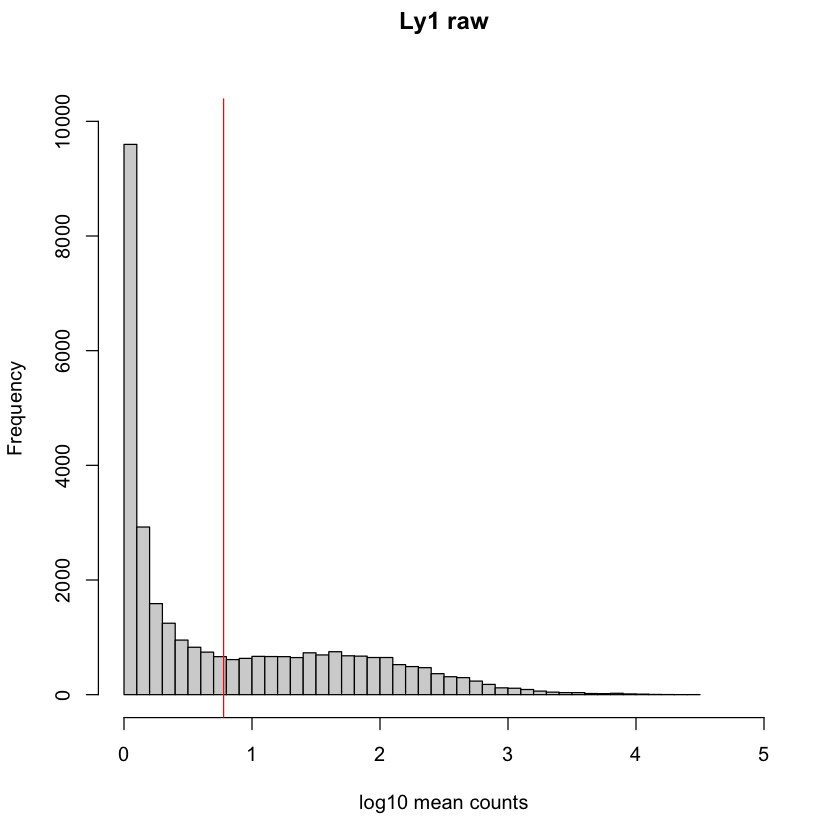

[1] "before filtering we have 29421 genes"
[1] "after allpying the threshold we will have 12427 genes"


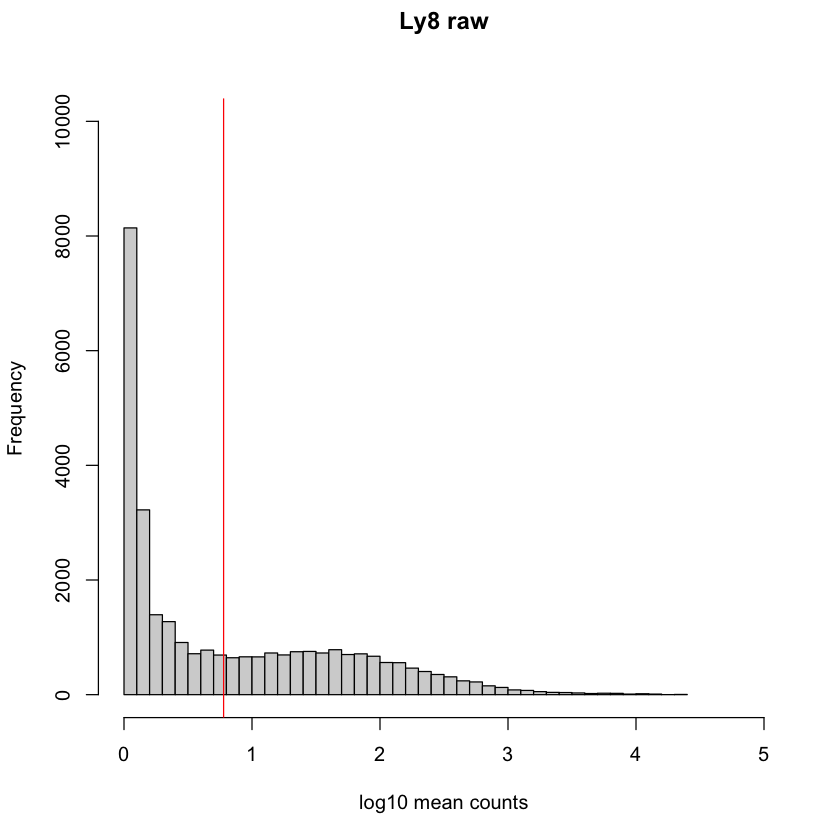

In [11]:
# make histogram of mean counts 
for(cell_line in cell_lines){
    print(cell_line)
    
    # subset counts
    my_counts <- counts[[cell_line]]
    
    hist(log10(rowMeans(my_counts)+1)
        ,breaks = 50
         ,main = paste(cell_line
                       ,"raw\n\n")
         ,ylab = "Frequency"
         ,xlab = "log10 mean counts"
         ,ylim = c(0,10000)
         ,xlim = c(0,5)
        )
    abline(v = log10(count_threshold +1)
         ,col = "red")
    
    print(paste("before filtering we have"
               ,nrow(my_counts)
               ,"genes"))
    print(paste("after allpying the threshold we will have"
              ,sum(rowMeans(my_counts) > count_threshold)
              ,"genes"))
}

[1] "Ly1"
     variable value
1 Ly1_KO_E8_1     0
2 Ly1_KO_E8_1   471
3 Ly1_KO_E8_1     3
4 Ly1_KO_E8_1    29
5 Ly1_KO_E8_1     0
6 Ly1_KO_E8_1     1
[1] "Ly8"
     variable value
1 Ly8_KO_G6_1     0
2 Ly8_KO_G6_1   626
3 Ly8_KO_G6_1     6
4 Ly8_KO_G6_1    17
5 Ly8_KO_G6_1     0
6 Ly8_KO_G6_1     0


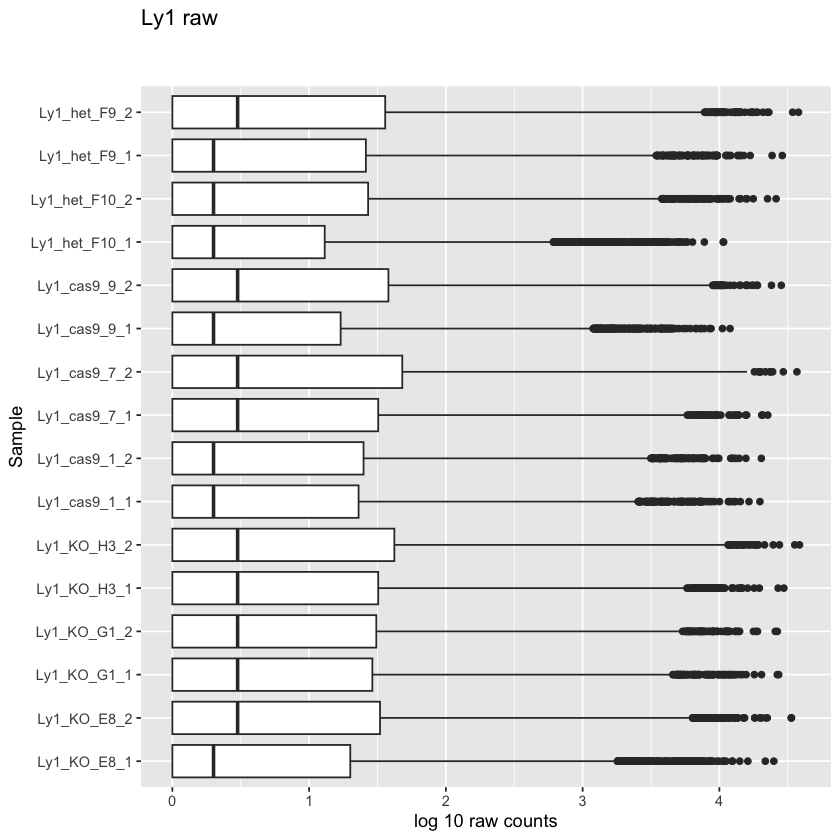

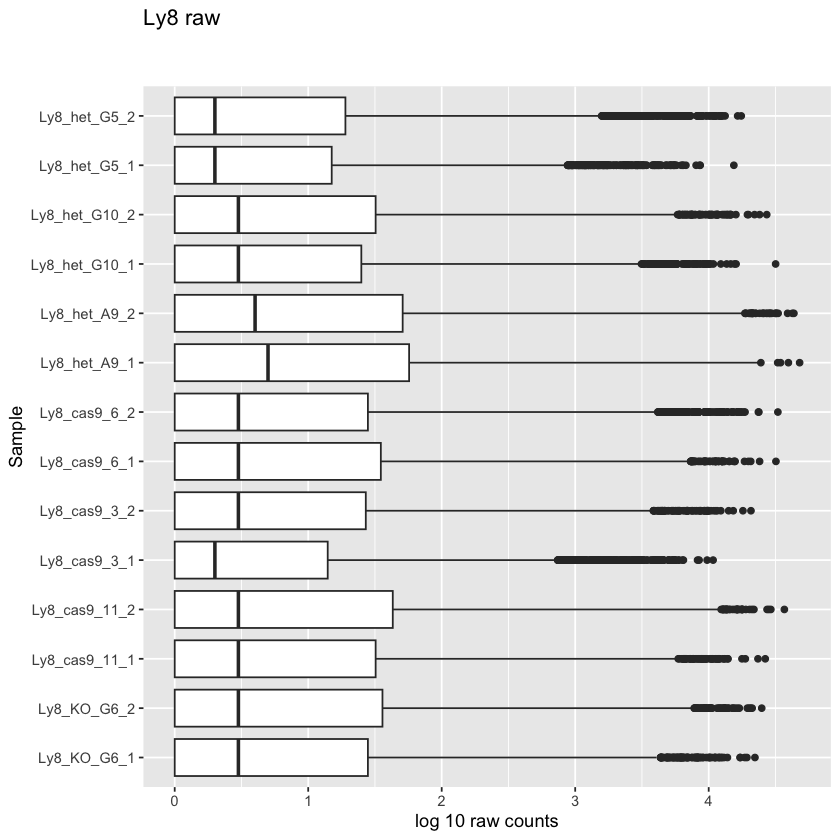

In [12]:
# bar plot of expression per sample
for(cell_line in cell_lines){
    print(cell_line)
    
    # subset counts
    my_counts <- counts[[cell_line]]
    
    # prepare df for plotting
    lf = melt(my_counts, id.vars=c())
    print(head(lf))

    # plot
    p <- ggplot(data=lf
           ,aes(x=variable
                ,y=log10(value+1)
               )
          ) + 
    geom_boxplot(aes(group=variable)) + 
    xlab("Sample") + 
    ylab("log 10 raw counts") + 
    ggtitle(paste(cell_line
                ,"raw\n\n")) +
      coord_flip()
    print(p)
}


### FIltering step

In [13]:
# filter by mean counts
counts_gf <- lapply(cell_lines
                   ,function(cell_line){
                        print(cell_line)

                        # subset coutns
                        my_counts <- counts[[cell_line]]

                        aboveThreshold <- rowMeans(my_counts) > count_threshold
                       print(str(aboveThreshold))

                        print(paste("before filtering we have"
                                    ,nrow(my_counts)
                                      ,"genes in"
                                      ,cell_line
                                   )
                             )

                        # filter counts
                        my_counts <- my_counts[aboveThreshold,]

                        print(paste("after filtering we have"
                                    ,nrow(my_counts)
                                      ,"genes in"
                                      ,cell_line
                                   )
                             )

                        my_counts
})
names(counts_gf) <- cell_lines
print(str(counts_gf))

[1] "Ly1"
 Named logi [1:30714] FALSE TRUE FALSE TRUE FALSE FALSE ...
 - attr(*, "names")= chr [1:30714] "ENSG00000000003" "ENSG00000000419" "ENSG00000000457" "ENSG00000000460" ...
NULL
[1] "before filtering we have 30714 genes in Ly1"
[1] "after filtering we have 12290 genes in Ly1"
[1] "Ly8"
 Named logi [1:29421] FALSE TRUE FALSE TRUE FALSE FALSE ...
 - attr(*, "names")= chr [1:29421] "ENSG00000000003" "ENSG00000000419" "ENSG00000000457" "ENSG00000000460" ...
NULL
[1] "before filtering we have 29421 genes in Ly8"
[1] "after filtering we have 12427 genes in Ly8"
List of 2
 $ Ly1:'data.frame':	12290 obs. of  16 variables:
  ..$ Ly1_KO_E8_1  : int [1:12290] 471 29 37 20 22 37 137 9 23 471 ...
  ..$ Ly1_KO_E8_2  : int [1:12290] 649 32 57 32 33 67 218 27 37 1105 ...
  ..$ Ly1_KO_G1_1  : int [1:12290] 663 48 43 40 32 70 168 9 50 993 ...
  ..$ Ly1_KO_G1_2  : int [1:12290] 563 36 32 24 30 73 160 17 49 1036 ...
  ..$ Ly1_KO_H3_1  : int [1:12290] 756 33 45 38 33 81 178 19 40 918 ...
  ..$ Ly1_

### Statistics after filtering

[1] "Ly1"
[1] "before filtering we have 12290 genes"
[1] "after allpying the threshold we will have 12290 genes"
[1] "Ly8"


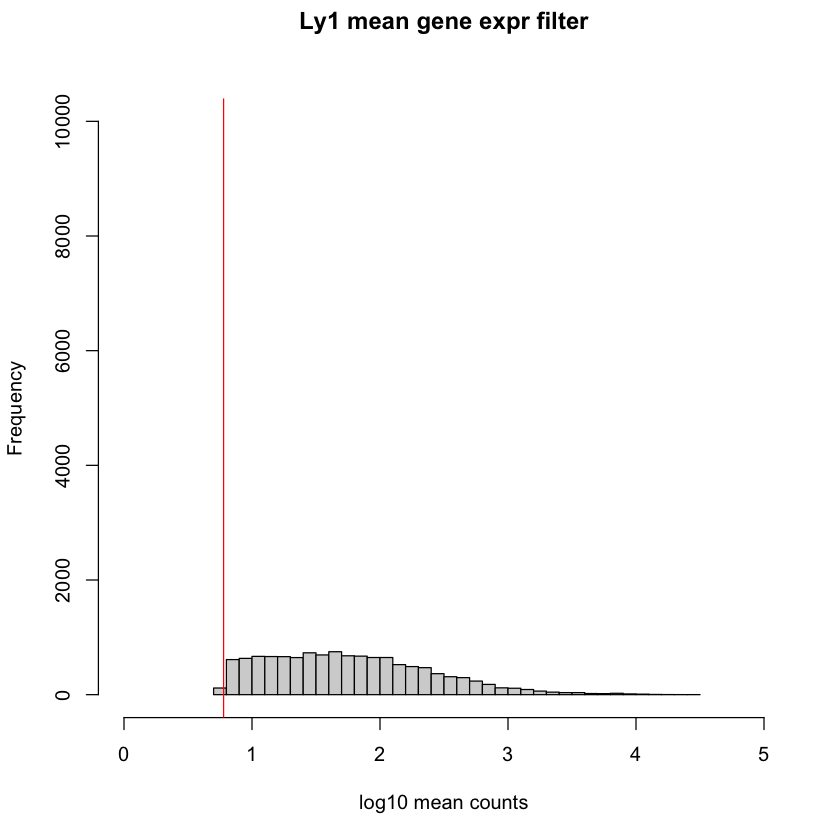

[1] "before filtering we have 12427 genes"
[1] "after allpying the threshold we will have 12427 genes"


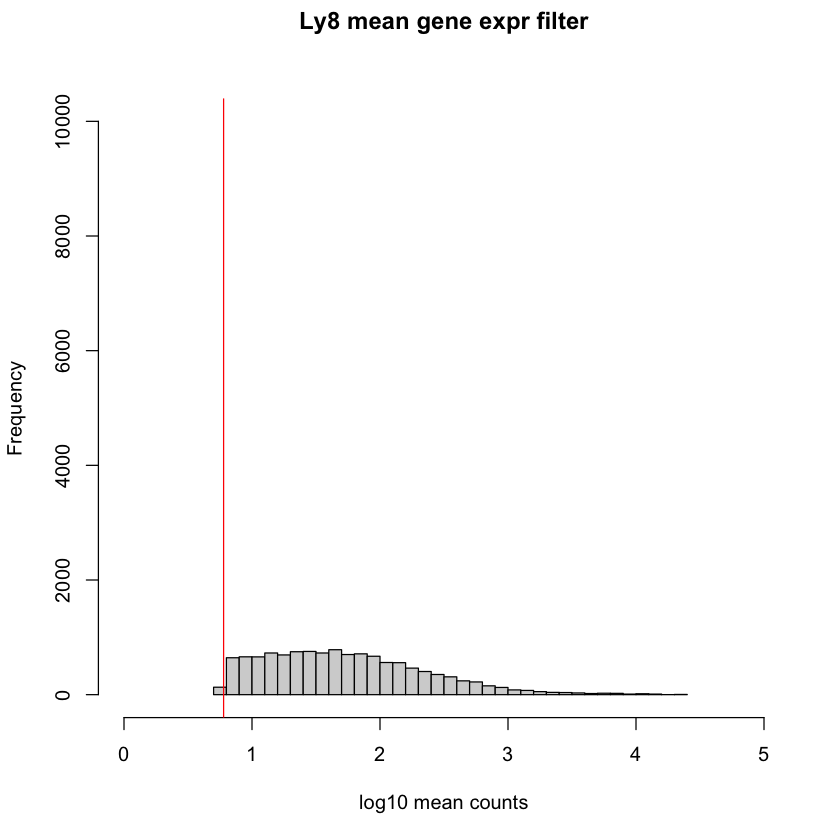

In [14]:
# make histogram of mean counts 
for(cell_line in cell_lines){
    print(cell_line)
    
    # subset counts
    my_counts <- counts_gf[[cell_line]]
    
    hist(log10(rowMeans(my_counts)+1)
        ,breaks = 50
         ,main = paste(cell_line
                       ,"mean gene expr filter\n\n")
         ,ylab = "Frequency"
         ,xlab = "log10 mean counts"
         ,ylim = c(0,10000)
         ,xlim = c(0,5)
        )
    abline(v = log10(count_threshold +1)
         ,col = "red")
    
    print(paste("before filtering we have"
               ,nrow(my_counts)
               ,"genes"))
    print(paste("after allpying the threshold we will have"
              ,sum(rowMeans(my_counts) > count_threshold)
              ,"genes"))
}

[1] "Ly1"
     variable value
1 Ly1_KO_E8_1   471
2 Ly1_KO_E8_1    29
3 Ly1_KO_E8_1    37
4 Ly1_KO_E8_1    20
5 Ly1_KO_E8_1    22
6 Ly1_KO_E8_1    37
[1] "Ly8"
     variable value
1 Ly8_KO_G6_1   626
2 Ly8_KO_G6_1    17
3 Ly8_KO_G6_1    65
4 Ly8_KO_G6_1    34
5 Ly8_KO_G6_1    22
6 Ly8_KO_G6_1    24


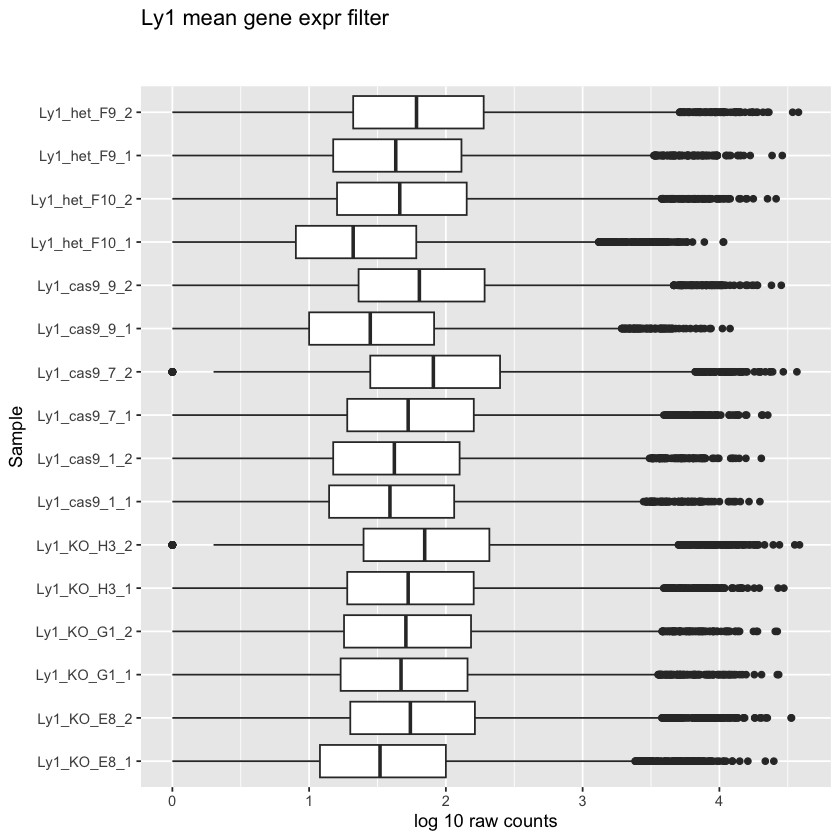

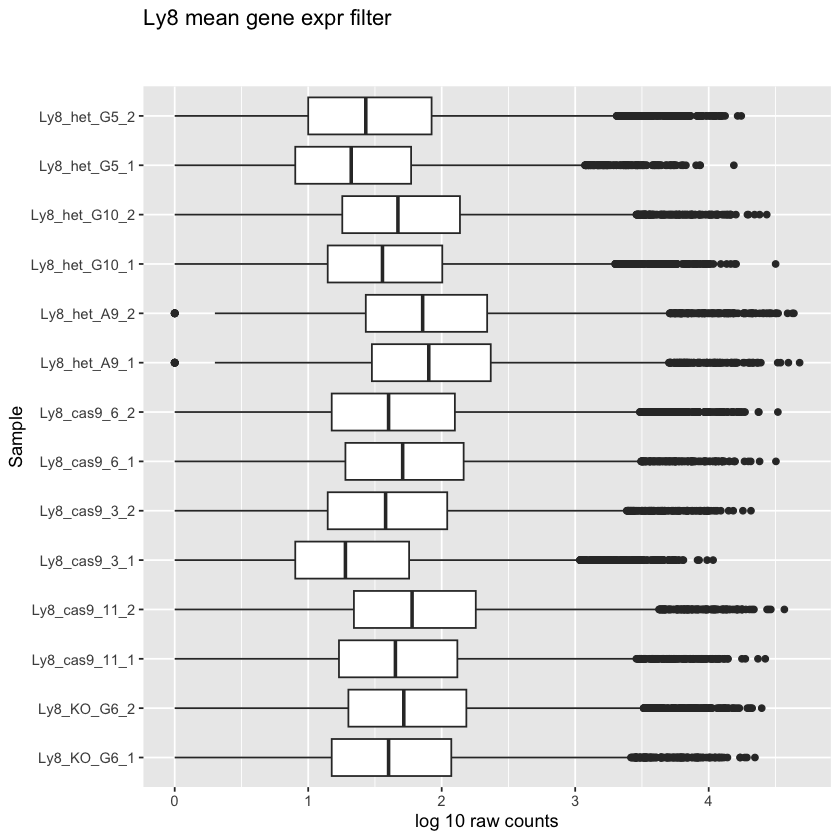

In [15]:
# bar plot of expression per sample
for(cell_line in cell_lines){
    print(cell_line)
    
    # subset counts
    my_counts <- counts_gf[[cell_line]]
    
    # prepare df for plotting
    lf = melt(my_counts, id.vars=c())
    print(head(lf))

    # plot
    p <- ggplot(data=lf
           ,aes(x=variable
                ,y=log10(value+1)
               )
          ) + 
    geom_boxplot(aes(group=variable)) + 
    xlab("Sample") + 
    ylab("log 10 raw counts") + 
    ggtitle(paste(cell_line
                       ,"mean gene expr filter\n\n")) +
      coord_flip()
    print(p)
}



# Gene annotation

In [16]:
# annotation
ensembl <- useMart("ensembl"
                   ,dataset = "hsapiens_gene_ensembl"
                   ,host = "https://jul2018.archive.ensembl.org"#"http://dec2017.archive.ensembl.org" the original version 91 is not vailable anymore
                  )
geneNames <- lapply(cell_lines
                    ,function(cell_line){
                        
                        print(cell_line)
    
                        # subset counts
                        my_counts <- counts_gf[[cell_line]]
                        
                        getBM(attributes = c ("ensembl_gene_id",
                                                "external_gene_name")
                                ,filter = "ensembl_gene_id"
                                ,values = rownames(my_counts)
                                ,mart = ensembl
                             )
                                })
names(geneNames) <- cell_lines

[1] "Ly1"
[1] "Ly8"


In [17]:
print(str(geneNames))
print(str(counts_gf))
print(str(anno))

List of 2
 $ Ly1:'data.frame':	12257 obs. of  2 variables:
  ..$ ensembl_gene_id   : chr [1:12257] "ENSG00000000419" "ENSG00000000460" "ENSG00000001084" "ENSG00000001167" ...
  ..$ external_gene_name: chr [1:12257] "DPM1" "C1orf112" "GCLC" "NFYA" ...
 $ Ly8:'data.frame':	12393 obs. of  2 variables:
  ..$ ensembl_gene_id   : chr [1:12393] "ENSG00000000419" "ENSG00000000460" "ENSG00000001036" "ENSG00000001084" ...
  ..$ external_gene_name: chr [1:12393] "DPM1" "C1orf112" "FUCA2" "GCLC" ...
NULL
List of 2
 $ Ly1:'data.frame':	12290 obs. of  16 variables:
  ..$ Ly1_KO_E8_1  : int [1:12290] 471 29 37 20 22 37 137 9 23 471 ...
  ..$ Ly1_KO_E8_2  : int [1:12290] 649 32 57 32 33 67 218 27 37 1105 ...
  ..$ Ly1_KO_G1_1  : int [1:12290] 663 48 43 40 32 70 168 9 50 993 ...
  ..$ Ly1_KO_G1_2  : int [1:12290] 563 36 32 24 30 73 160 17 49 1036 ...
  ..$ Ly1_KO_H3_1  : int [1:12290] 756 33 45 38 33 81 178 19 40 918 ...
  ..$ Ly1_KO_H3_2  : int [1:12290] 908 29 56 45 50 85 277 20 59 1472 ...
  ..$ Ly1

In [18]:
# set rownames as symbols
counts_gf <- lapply(cell_lines
                   ,function(cell_line){
                       print(cell_line)
                       my_counts <- counts_gf[[cell_line]]
                       my_genes <- geneNames[[cell_line]]
                       
                       #print(str(my_counts))
                       #print(str(my_genes))
                       
                       my_counts <- my_counts[rownames(my_counts) %in% my_genes$ensembl_gene_id,]
                       
                       
                       idx_good <- !duplicated(my_genes$external_gene_name)
                       my_counts <- my_counts[idx_good,]
                       
                       rownames(my_counts) <- my_genes$external_gene_name[idx_good]
                       
                       print(str(my_counts))
                       
                       print(head(rownames(my_counts)))
                       
                       
                       
                       my_counts
                   })

names(counts_gf) <- cell_lines
print(str(counts_gf))


[1] "Ly1"
'data.frame':	12256 obs. of  16 variables:
 $ Ly1_KO_E8_1  : int  471 29 37 20 22 37 137 9 23 471 ...
 $ Ly1_KO_E8_2  : int  649 32 57 32 33 67 218 27 37 1105 ...
 $ Ly1_KO_G1_1  : int  663 48 43 40 32 70 168 9 50 993 ...
 $ Ly1_KO_G1_2  : int  563 36 32 24 30 73 160 17 49 1036 ...
 $ Ly1_KO_H3_1  : int  756 33 45 38 33 81 178 19 40 918 ...
 $ Ly1_KO_H3_2  : int  908 29 56 45 50 85 277 20 59 1472 ...
 $ Ly1_cas9_1_1 : int  488 22 20 35 24 56 145 18 35 496 ...
 $ Ly1_cas9_1_2 : int  510 20 31 30 31 65 140 4 35 539 ...
 $ Ly1_cas9_7_1 : int  654 21 44 44 35 105 207 17 54 723 ...
 $ Ly1_cas9_7_2 : int  1002 43 73 59 57 152 349 18 85 1105 ...
 $ Ly1_cas9_9_1 : int  316 21 17 31 13 33 105 11 29 328 ...
 $ Ly1_cas9_9_2 : int  819 32 39 30 52 97 227 6 67 796 ...
 $ Ly1_het_F10_1: int  238 9 15 8 12 24 78 4 15 367 ...
 $ Ly1_het_F10_2: int  563 30 51 39 24 47 183 10 17 1140 ...
 $ Ly1_het_F9_1 : int  559 30 25 24 34 73 168 12 27 679 ...
 $ Ly1_het_F9_2 : int  797 39 50 32 45 84 242 1

# Normalization

In [19]:
# make dds objects
dds <- lapply(cell_lines
             ,function(cell_line){
                 # subset
                 my_counts <- counts_gf[[cell_line]]
                 my_anno <- anno[[cell_line]]
                 
                 DESeqDataSetFromMatrix(countData = my_counts 
                                        ,colData = my_anno
                                        ,design = ~ contrast
                                        )
             }
             )
names(dds) <- cell_lines
print(str(dds))

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


List of 2
 $ Ly1:Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  .. ..@ design            :Class 'formula'  language ~contrast
  .. .. .. ..- attr(*, ".Environment")=<environment: 0x7f98595fa140> 
  .. ..@ dispersionFunction:function ()  
  .. ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. .. ..@ NAMES          : N

In [20]:
# normalize
dds <- lapply(cell_lines
              ,function(cell_line){
                  print(cell_line)
                  
                  # subset
                  my_dds <- dds[[cell_line]]
                  
                  # normalize
                  DESeq(my_dds)
              })#

names(dds) <- cell_lines
print(str(dds))

[1] "Ly1"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 4 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Ly8"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 27 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



List of 2
 $ Ly1:Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  .. ..@ design            :Class 'formula'  language ~contrast
  .. .. .. ..- attr(*, ".Environment")=<environment: 0x7f98595fa140> 
  .. ..@ dispersionFunction:function (q)  
  .. .. ..- attr(*, "coefficients")= Named num [1:2] 0.0137 1.0318
  .. .. .. ..- attr(*, "names")= chr [1:2] "asymptDisp" "extraPois"
  .. .. ..- attr(*, "fitType")= chr "parametric"
  .. .. ..- attr(*, "varLogDispEsts")= num 0.801
  .. .. ..- attr(*, "dispPriorVar")= num 0.647
  .. ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .

In [21]:
# extract norm counts
counts_gf_norm <- lapply(cell_lines
                        ,function(cell_line){
                            # subset
                            my_dds <- dds[[cell_line]]
                            
                            # extract counts
                            data.frame(counts(my_dds
                                              , normalized=TRUE
                                             )
                                      )
                        })
names(counts_gf_norm) <- cell_lines
print(str(counts_gf_norm))

List of 2
 $ Ly1:'data.frame':	12256 obs. of  16 variables:
  ..$ Ly1_KO_E8_1  : num [1:12256] 640.1 39.4 50.3 27.2 29.9 ...
  ..$ Ly1_KO_E8_2  : num [1:12256] 542.8 26.8 47.7 26.8 27.6 ...
  ..$ Ly1_KO_G1_1  : num [1:12256] 645.4 46.7 41.9 38.9 31.2 ...
  ..$ Ly1_KO_G1_2  : num [1:12256] 517.3 33.1 29.4 22.1 27.6 ...
  ..$ Ly1_KO_H3_1  : num [1:12256] 647 28.2 38.5 32.5 28.2 ...
  ..$ Ly1_KO_H3_2  : num [1:12256] 595.8 19 36.7 29.5 32.8 ...
  ..$ Ly1_cas9_1_1 : num [1:12256] 588.9 26.5 24.1 42.2 29 ...
  ..$ Ly1_cas9_1_2 : num [1:12256] 572 22.4 34.8 33.6 34.8 ...
  ..$ Ly1_cas9_7_1 : num [1:12256] 568.2 18.2 38.2 38.2 30.4 ...
  ..$ Ly1_cas9_7_2 : num [1:12256] 564.9 24.2 41.2 33.3 32.1 ...
  ..$ Ly1_cas9_9_1 : num [1:12256] 544.2 36.2 29.3 53.4 22.4 ...
  ..$ Ly1_cas9_9_2 : num [1:12256] 595.6 23.3 28.4 21.8 37.8 ...
  ..$ Ly1_het_F10_1: num [1:12256] 544.3 20.6 34.3 18.3 27.4 ...
  ..$ Ly1_het_F10_2: num [1:12256] 559.2 29.8 50.7 38.7 23.8 ...
  ..$ Ly1_het_F9_1 : num [1:12256] 584

In [22]:
# relevel contrast
dds <- lapply(cell_lines
             ,function(cell_line){
                 # subset 
                 my_dss <- dds[[cell_line]]
                 
                 my_dss$contrast <- relevel( my_dss$contrast, "wt" )
                 my_dss
             })
names(dds) <- cell_lines

[1] "Ly1"
     variable     value
1 Ly1_KO_E8_1 640.14715
2 Ly1_KO_E8_1  39.41458
3 Ly1_KO_E8_1  50.28757
4 Ly1_KO_E8_1  27.18247
5 Ly1_KO_E8_1  29.90072
6 Ly1_KO_E8_1  50.28757
[1] "Ly8"
     variable     value
1 Ly8_KO_G6_1 639.61766
2 Ly8_KO_G6_1  17.36981
3 Ly8_KO_G6_1  66.41397
4 Ly8_KO_G6_1  34.73962
5 Ly8_KO_G6_1  22.47858
6 Ly8_KO_G6_1  24.52208


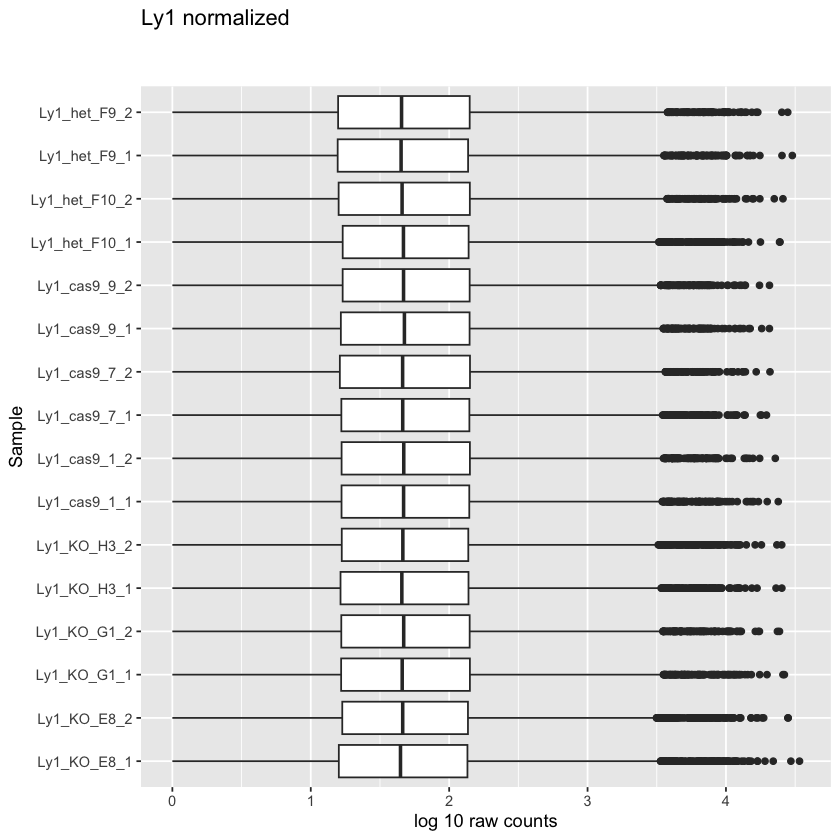

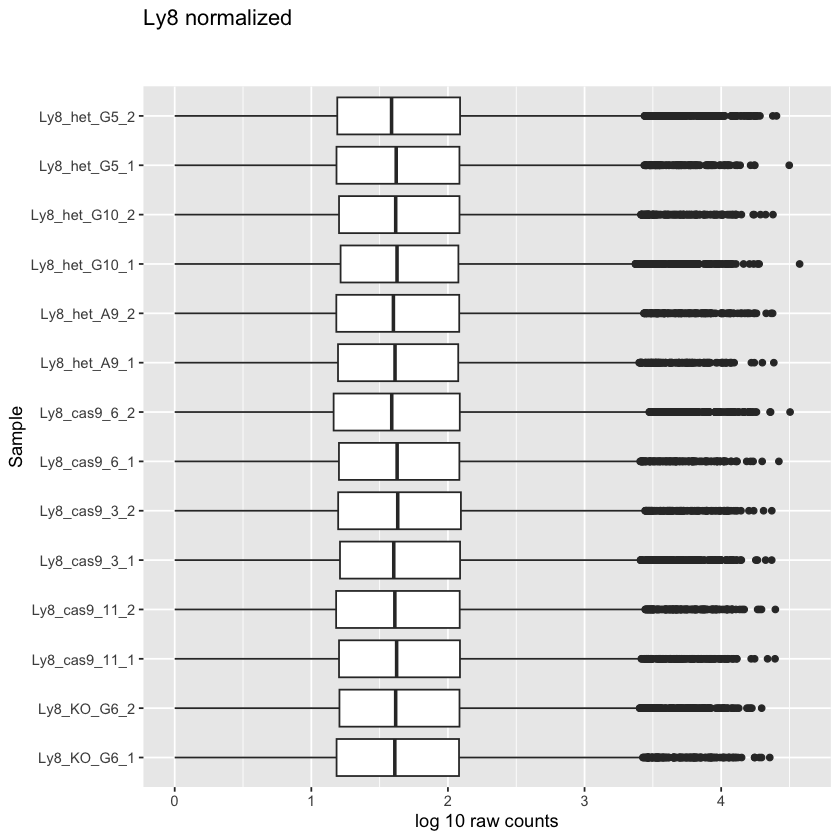

In [23]:
# plot norm counts
for(cell_line in cell_lines){
    print(cell_line)
    
    # subset counts
    my_counts <- counts_gf_norm[[cell_line]]
    
    # prepare df for plotting
    lf = melt(my_counts, id.vars=c())
    print(head(lf))

    # plot
    p <- ggplot(data=lf
           ,aes(x=variable#Var2
                ,y=log10(value+1)
               )
          ) + 
    geom_boxplot(aes(group=variable#Var2
                    )
                ) + 
    xlab("Sample") + 
    ylab("log 10 raw counts") + 
    ggtitle(paste(cell_line
                ,"normalized\n\n")) +
      coord_flip()
    print(p)
}



In [24]:
# add total norm counts to annotation
for(cell_line in cell_lines){
    anno[[cell_line]]$total_norm <- colSums(counts_gf_norm[[cell_line]])
}
print(str(anno))

List of 2
 $ Ly1:'data.frame':	16 obs. of  6 variables:
  ..$ ID        : chr [1:16] "Ly1_KO_E8_1" "Ly1_KO_E8_2" "Ly1_KO_G1_1" "Ly1_KO_G1_2" ...
  ..$ Cell_line : chr [1:16] "Ly1" "Ly1" "Ly1" "Ly1" ...
  ..$ phenotype : chr [1:16] "ko" "ko" "ko" "ko" ...
  ..$ Replicate : int [1:16] 1 2 1 2 1 2 1 2 1 2 ...
  ..$ contrast  : chr [1:16] "mut" "mut" "mut" "mut" ...
  ..$ total_norm: num [1:16] 2751747 2611113 2641137 2498573 2528534 ...
 $ Ly8:'data.frame':	14 obs. of  6 variables:
  ..$ ID        : chr [1:14] "Ly8_KO_G6_1" "Ly8_KO_G6_2" "Ly8_cas9_11_1" "Ly8_cas9_11_2" ...
  ..$ Cell_line : chr [1:14] "Ly8" "Ly8" "Ly8" "Ly8" ...
  ..$ phenotype : chr [1:14] "ko" "ko" "wt" "wt" ...
  ..$ Replicate : int [1:14] 1 2 1 2 1 2 1 2 1 2 ...
  ..$ contrast  : chr [1:14] "mut" "mut" "wt" "wt" ...
  ..$ total_norm: num [1:14] 2485984 2389367 2436406 2491163 2514419 ...
NULL


# Differentially expressed genes

In [25]:
# padj threshold
padj_threshold <- 0.1

In [26]:
# log2fc threshold
log2FC_threshold <- 1

In [27]:
dds <- lapply(cell_lines
                  ,function(cell_line){
                      print(cell_line)
                      
                      # subset
                      my_dds <- dds[[cell_line]]
                      
                      # DE gene
                      DESeq(my_dds)
                  })
names(dds) <- cell_lines
print(str(dds))

[1] "Ly1"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 4 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Ly8"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 27 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



List of 2
 $ Ly1:Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  .. ..@ design            :Class 'formula'  language ~contrast
  .. .. .. ..- attr(*, ".Environment")=<environment: 0x7f98595fa140> 
  .. ..@ dispersionFunction:function (q)  
  .. .. ..- attr(*, "coefficients")= Named num [1:2] 0.0137 1.0318
  .. .. .. ..- attr(*, "names")= chr [1:2] "asymptDisp" "extraPois"
  .. .. ..- attr(*, "fitType")= chr "parametric"
  .. .. ..- attr(*, "varLogDispEsts")= num 0.801
  .. .. ..- attr(*, "dispPriorVar")= num 0.647
  .. ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .

In [28]:
de_genes <- lapply(cell_lines
                  ,function(cell_line){
                      print(cell_line)
                      
                      # subset
                      my_dds <- dds[[cell_line]]
                      
                      # DE gene
                      results(my_dds
                             ,contrast = c("contrast"
                                          ,"mut"
                                          ,"wt"))
                  })
names(de_genes) <- cell_lines
print(str(de_genes))

[1] "Ly1"
[1] "Ly8"
List of 2
 $ Ly1:Formal class 'DESeqResults' [package "DESeq2"] with 7 slots
  .. ..@ priorInfo      : list()
  .. ..@ rownames       : chr [1:12256] "DPM1" "C1orf112" "GCLC" "NFYA" ...
  .. ..@ nrows          : int 12256
  .. ..@ elementType    : chr "ANY"
  .. ..@ elementMetadata:Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. .. ..@ rownames       : NULL
  .. .. .. ..@ nrows          : int 6
  .. .. .. ..@ elementType    : chr "ANY"
  .. .. .. ..@ elementMetadata: NULL
  .. .. .. ..@ metadata       : list()
  .. .. .. ..@ listData       :List of 2
  .. .. .. .. ..$ type       : chr [1:6] "intermediate" "results" "results" "results" ...
  .. .. .. .. ..$ description: chr [1:6] "mean of normalized counts for all samples" "log2 fold change (MLE): contrast mut vs wt" "standard error: contrast mut vs wt" "Wald statistic: contrast mut vs wt" ...
  .. ..@ metadata       :List of 6
  .. .. ..$ filterThreshold: Named num 0.426
  .. .. .. ..- attr(*, "name

# Export

In [29]:
# export filtered norm counts
for(cell_line in cell_lines){
    # subset counts
    my_counts <- counts_gf_norm[[cell_line]]
    
    write.table(my_counts
               ,file = paste0("counts_norm_"
                             ,cell_line
                             ,".txt"
                             )
               ,sep = "\t"
               ,row.names = TRUE
               ,col.names= TRUE)
}

In [30]:
# export annotation
for(cell_line in cell_lines){
    # subset counts
    my_anno <- anno[[cell_line]]
    
    write.table(my_anno
               ,file = paste0("anno_"
                             ,cell_line
                             ,".txt"
                             )
               ,sep = "\t"
               ,row.names = TRUE
               ,col.names= TRUE)
}

In [31]:
## export de genes
de_genes[["Ly1"]]$gene_name <- rownames(de_genes[["Ly1"]])
de_genes[["Ly1"]]$cell_line <- "OCI-Ly1"

de_genes[["Ly8"]]$gene_name <- rownames(de_genes[["Ly8"]])
de_genes[["Ly8"]]$cell_line <- "OCI-Ly8"
print(head(de_genes[["Ly8"]]))

my_de_genes <- rbind(de_genes[["Ly1"]]
                    ,de_genes[["Ly8"]])

print(str(my_de_genes))
   
write.table(my_de_genes
           ,file = "TableS7_de_genes.txt"
           ,sep = "\t"
           ,row.names = FALSE
           ,col.names= TRUE)



log2 fold change (MLE): contrast mut vs wt 
Wald test p-value: contrast mut vs wt 
DataFrame with 6 rows and 8 columns
          baseMean log2FoldChange     lfcSE       stat    pvalue      padj
         <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
DPM1      557.0577      0.0587303  0.102183  0.5747540  0.565458  0.803316
C1orf112   22.0320     -0.1581457  0.214972 -0.7356566  0.461940  0.735432
FUCA2      28.8274     -0.0324795  0.995595 -0.0326232  0.973975  0.990599
GCLC       27.8698      0.0859944  0.197717  0.4349367  0.663608  0.858196
NFYA       30.8053      0.0407529  0.214551  0.1899448  0.849352  0.942276
STPG1      26.2410      0.2111634  0.239360  0.8822018  0.377668  0.674138
           gene_name   cell_line
         <character> <character>
DPM1            DPM1     OCI-Ly8
C1orf112    C1orf112     OCI-Ly8
FUCA2          FUCA2     OCI-Ly8
GCLC            GCLC     OCI-Ly8
NFYA            NFYA     OCI-Ly8
STPG1          STPG1     OCI-Ly8
Formal class 'DES